In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[111.  98. 105.]
  [101.  88.  95.]
  [145. 132. 139.]
  ...
  [166. 156. 164.]
  [164. 154. 162.]
  [165. 155. 163.]]

 [[120. 107. 114.]
  [111.  98. 105.]
  [145. 132. 139.]
  ...
  [164. 154. 162.]
  [164. 154. 162.]
  [166. 156. 164.]]

 [[122. 109. 116.]
  [118. 105. 112.]
  [139. 126. 133.]
  ...
  [165. 155. 163.]
  [166. 156. 164.]
  [170. 160. 168.]]

 ...

 [[ 99.  87.  97.]
  [109.  97. 107.]
  [107.  95. 105.]
  ...
  [146. 138. 149.]
  [147. 139. 150.]
  [145. 137. 148.]]

 [[104.  92. 102.]
  [110.  98. 108.]
  [110.  98. 108.]
  ...
  [141. 133. 144.]
  [142. 134. 145.]
  [141. 133. 144.]]

 [[104.  92. 102.]
  [107.  95. 105.]
  [108.  96. 106.]
  ...
  [135. 127. 138.]
  [137. 129. 140.]
  [136. 128. 139.]]], shape=(256, 256, 3), dtype=float32)
[1 0 1 0 0 1 1 0 0 0 1 0 2 0 1 0 2 1 0 1 0 1 0 1 1 1 1 0 1 2 1 0]


ValueError: num must be an integer with 1 <= num <= 16, not 17

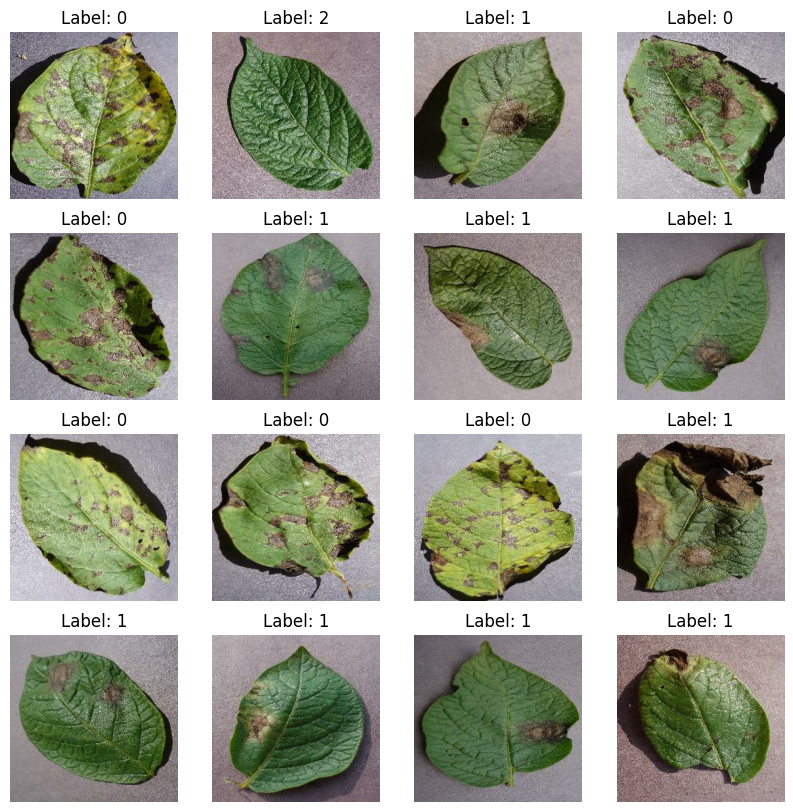

In [18]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(len(image_batch)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
plt.show()

In [19]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [25]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [24]:
val_ds = test_ds.take(6)
len(test_ds)

14

In [26]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1.shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    ds.skip(train_size).take(val_size)
    ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

SyntaxError: invalid syntax (3281448669.py, line 1)

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)